# EDA (Exploratory Data Analysis)

EDA的价值主要在于熟悉数据集，了解数据集，对数据集进行验证来确定所获得数据集可以用于接下来的机器学习或者深度学习使用。
当了解了数据集之后我们下一步就是要去了解变量间的相互关系以及变量与预测值之间的存在关系。
引导数据科学从业者进行数据处理以及特征工程的步骤,使数据集的结构和特征集让接下来的预测问题更加可靠。
完成对于数据的探索性分析，并对于数据进行一些图表或者文字总结并打卡。

In [1]:
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

## 1. Import data and Simple Investigation

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
Train_data = pd.read_csv('./train.csv')
Test_data = pd.read_csv('./testA.csv')

### 1.1 Head_Tail Data Display

In [3]:
Train_data.head().append(Train_data.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [4]:
Test_data.head().append(Test_data.tail())

,id,heartbeat_signals
0,100000,"0.9915713654170097,1.0,0.6318163407681274,0.13..."
1,100001,"0.6075533139615096,0.5417083883163654,0.340694..."
2,100002,"0.9752726292239277,0.6710965234906665,0.686758..."
3,100003,"0.9956348033996116,0.9170249621481004,0.521096..."
4,100004,"1.0,0.8879490481178918,0.745564725322326,0.531..."
19995,119995,"1.0,0.8330283177934747,0.6340472606311671,0.63..."
19996,119996,"1.0,0.8259705825857048,0.4521053488322387,0.08..."
19997,119997,"0.951744840752379,0.9162611283848351,0.6675251..."
19998,119998,"0.9276692903808186,0.6771898159607004,0.242906..."
19999,119999,"0.6653212231837624,0.527064114047737,0.5166625..."


### 1.2 Size of dataset

In [5]:
## Train data
Train_data.shape

(100000, 3)

In [6]:
## Test data A
Test_data.shape

(20000, 2)

### 1.3 Look into dataset in statical way

**1.3.1 Basic information of distribution, such as count,average, standard deviation, min/max values, and etc.**

In [7]:
Train_data.describe()

,id,label
count,100000.000000,100000.000000
mean,49999.500000,0.856960
std,28867.657797,1.217084
min,0.000000,0.000000
25%,24999.750000,0.000000
50%,49999.500000,0.000000
75%,74999.250000,2.000000
max,99999.000000,3.000000


**1.3.2 Basic information of data types of variables in dataset**

In [8]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   heartbeat_signals  100000 non-null  object 
 2   label              100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [9]:
Test_data.describe()

,id
count,20000.000000
mean,109999.500000
std,5773.647028
min,100000.000000
25%,104999.750000
50%,109999.500000
75%,114999.250000
max,119999.000000


In [10]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 20000 non-null  int64 
 1   heartbeat_signals  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


**1.3.3 Quick overvieww data missing/data abonormality cases in each data column**

In [11]:
Train_data.isnull().sum()

id                   0
heartbeat_signals    0
label                0
dtype: int64

In [12]:
Test_data.isnull().sum()

id                   0
heartbeat_signals    0
dtype: int64

**1.3.4 Distribution of dependent variable**

In [13]:
Train_data['label'].value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

**无界约翰逊分布，指可以经由约翰逊转换变成正态分布的一种特殊的分布**

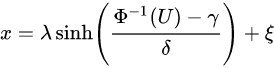

Where U is a random variable that is uniformly distributed on the unit interval [0, 1]

and Φ is the cumulative distribution function of the normal distribution

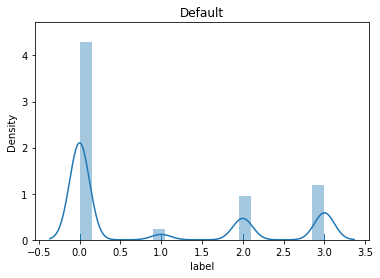

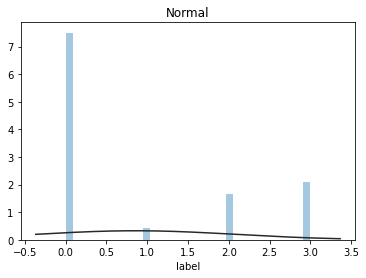

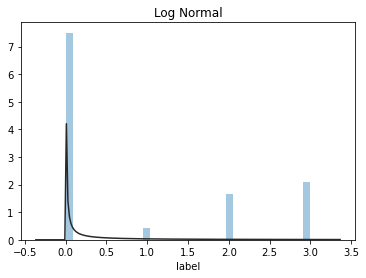

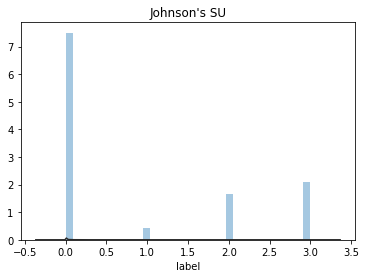

In [14]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['label']
plt.figure(1); plt.title('Default')
sns.distplot(y, rug=True, bins=20)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.figure(4); plt.title('Johnson\'s SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

**Skewness(偏度) of distribution:**


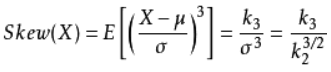

偏度（skewness），是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。定义上偏度是样本的三阶标准化矩。


1) Skew>0: right skewed

2) Skew=0: bell shape

3) Skew<0: left skewed

**Kurtosis（峰度） of distribution:**

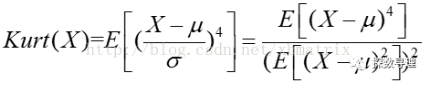
峰度（peakedness；kurtosis）又称峰态系数。表征概率密度分布曲线在平均值处峰值高低的特征数。直观看来，峰度反映了峰部的尖度。随机变量的峰度计算方法为：随机变量的四阶中心矩与方差平方的比值。

1) Kurt>3: fat tail

2) Kurt=3: bell shape

3) Kurt<3: thin tail

Skewness: 0.871005
Kurtosis: -1.009573


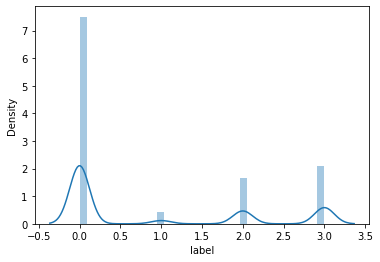

In [15]:
# 2）查看skewness and kurtosis
sns.distplot(Train_data['label']);
print("Skewness: %f" % Train_data['label'].skew())
print("Kurtosis: %f" % Train_data['label'].kurt())

In [16]:
Train_data.skew(), Train_data.kurt()

(id       0.000000
 label    0.871005
 dtype: float64,
 id      -1.200000
 label   -1.009573
 dtype: float64)

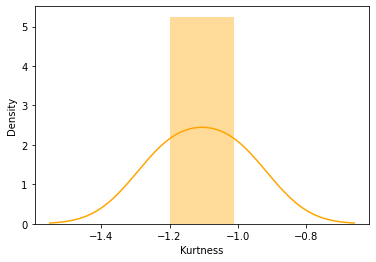

In [17]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

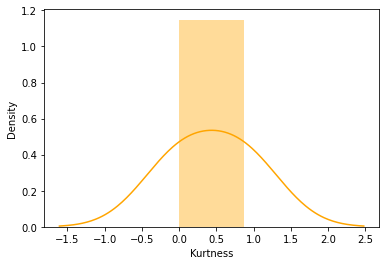

In [18]:
sns.distplot(Train_data.skew(),color='orange',axlabel ='Kurtness')

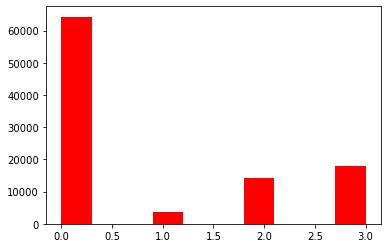

In [19]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['label'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

**1.3.5 Generate data report**

In [ ]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

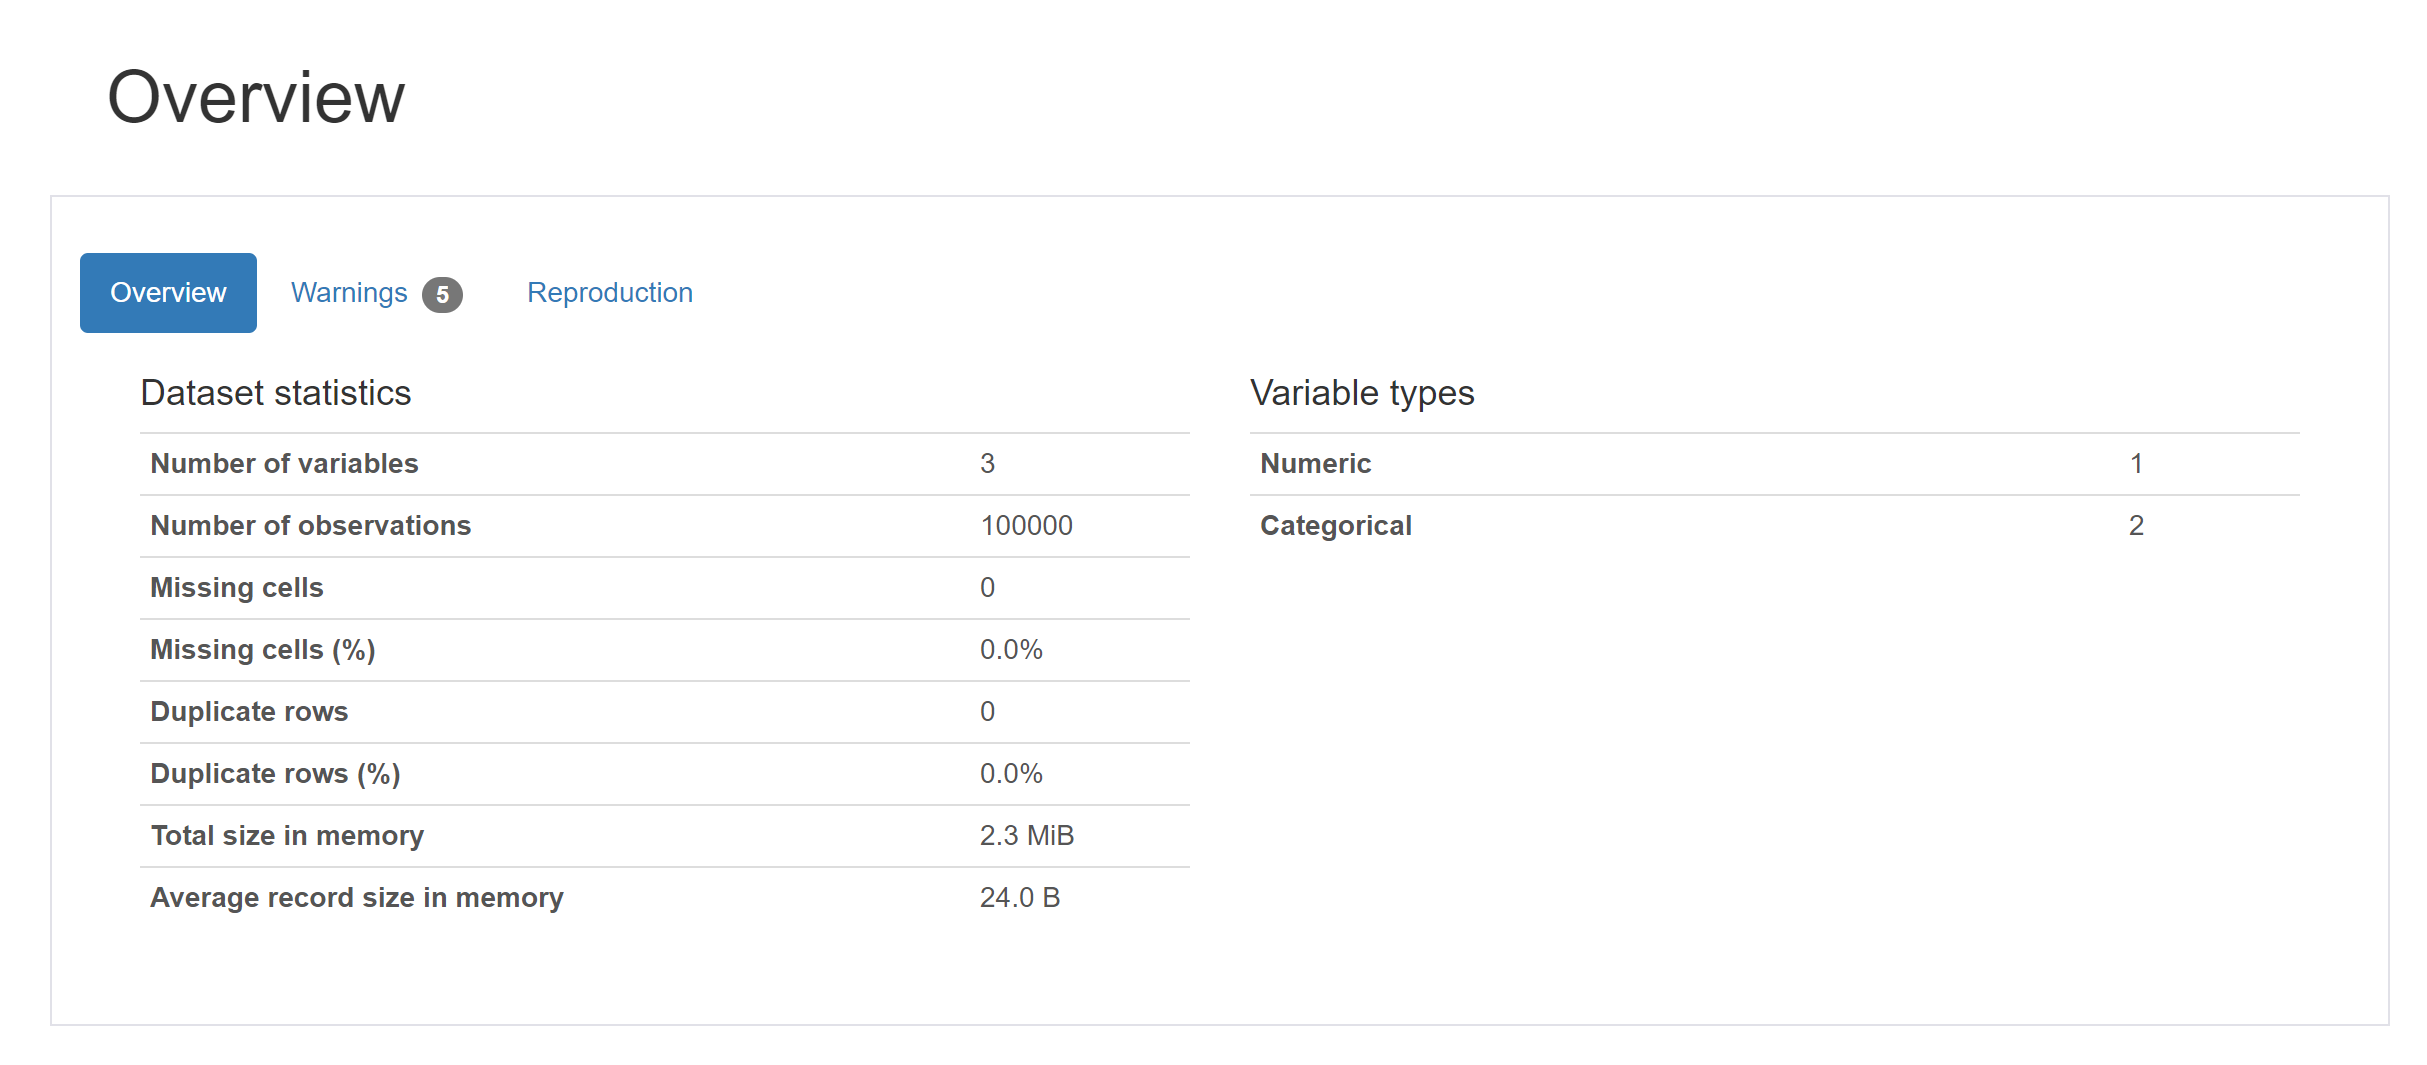

## 2. Conclusion

数据探索性分析是我们初步了解数据，熟悉数据为特征工程做准备的阶段，甚至很多时候EDA阶段提取出来的特征可以直接当作规则来用。可见EDA的重要性，这个阶段的主要工作还是借助于各个简单的统计量来对数据整体的了解，分析各个类型变量相互之间的关系，以及用合适的图形可视化出来直观观察。希望本节内容能给初学者带来帮助，更期待各位学习者对其中的不足提出建议。